In [2]:
#importing pandas, numpy, and matplot
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#importing built environment conditions dataset
bdc_data = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/61a264ec-a537-42de-91e3-5752d689103d/download/built-enviornment-conditions.csv",
                      index_col="Neighborhood", thousands=',')
bdc_data.head()

,Sector #,Population (2010),Land Area (acres),Approx. Total # Parcels (2010),Approx. Total # Taxable Parcels (2010),Approx. # of Structures (2010),Approx. # Unoccupied Parcels (2010),% Good / Excellent Condition Buildings (2009),% Average Condition Buildings (2009),% Poor / Derelict Condition Buildings (2009),...,$ Residential Bldg. Permits (2010),# Commercial Bldg. Permits (2010),$ Commercial Bldg. Permits (2010),# Code Violations (2010),% of all Bldgs. w/ Code Violations (2010),# Condemned Structures (2010),% of all Bldgs. Condemned (2010),# Demolitions (2010),# Tax Delinquent Prop. (2+ yrs.) (2010),% of Taxable Prop. Delinquent (2010)
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,3,933,134.4,67,26,58,15,NaN,NaN,NaN,...,$0,6,"$6,314,000",0,0.0%,0,0.0%,0,0,0.0%
Allegheny West,3,462,90.2,282,234,176,49,72.0%,22.3%,5.7%,...,"$30,784",6,"$795,300",3,1.7%,1,0.6%,0,3,1.3%
Allentown,6,2500,188.8,1550,1402,1283,334,2.5%,86.9%,10.6%,...,"$349,708",1,"$350,000",175,13.6%,30,2.3%,16,287,20.5%
Arlington,7,1869,300.8,1049,950,1034,198,0.3%,97.6%,2.1%,...,"$159,496",1,"$50,000",130,12.6%,10,1.0%,7,142,14.9%
Arlington Heights,7,244,84.5,10,7,13,4,NaN,NaN,NaN,...,$0,0,$0,0,0.0%,0,0.0%,0,3,42.9%


This is our dataset that we will be working with for our built environment conditions metric.

Specifically we will be looking at the number of code violations per neighborhood to determine the best neighborhood. Population will also be taken into account as areas with a higher population will experience more traffic through these buildings.


In [4]:
code_violations = bdc_data.loc[:,["# Code Violations (2010)"]]
code_violations_sorted = code_violations["# Code Violations (2010)"].sort_values(ascending=True)
code_violations_sorted.head()

Neighborhood
Allegheny Center     0
Glen Hazel           0
Northview Heights    0
Arlington Heights    0
Regent Square        1
Name: # Code Violations (2010), dtype: int64

This is our sorted code violations from the neighborhood with the least number of violations to the most. This shows us that there are four neighborhoods with no violations: Allegheny Center, Glen Hazel, Northview Heights, and Arlington Heights.

In [5]:
num_structures = bdc_data.loc[:, ["Approx. # of Structures (2010)"]].astype(int)
# population = population.astype(float)
num_structures_sorted = num_structures["Approx. # of Structures (2010)"].sort_values(ascending=True)
num_structures_sorted.head()

Neighborhood
Arlington Heights    13
North Shore          41
Allegheny Center     58
South Shore          63
Glen Hazel           65
Name: Approx. # of Structures (2010), dtype: int64

This is our sorted population from the neighborhood with the least number of structures to the most structures. This shows us that some of the neighborhoods with the least number of code violations are also the neighborhoods with the least number of structures.

Text(0, 0.5, '# of Code Violations')

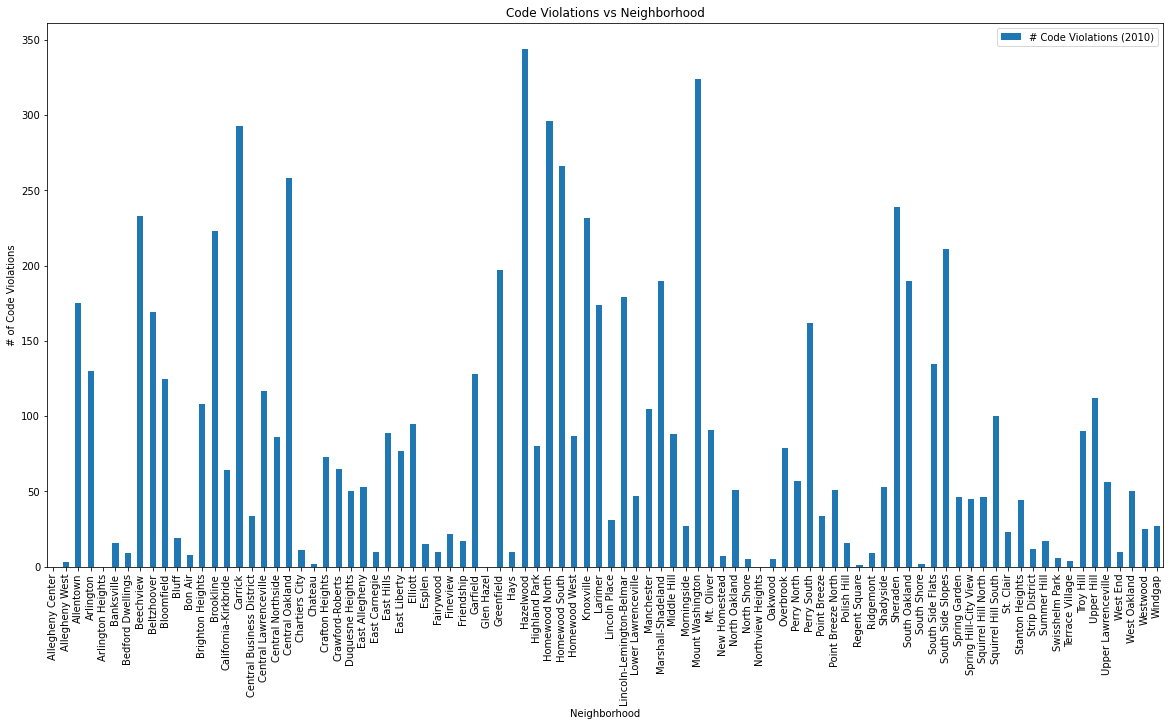

In [6]:
# shows us the bar graph for code violations per neighborhood
code_violations.plot(kind="bar", title="Code Violations vs Neighborhood", figsize=(20, 10))
plt.ylabel("# of Code Violations")

Text(0, 0.5, 'Approx. # of Structures')

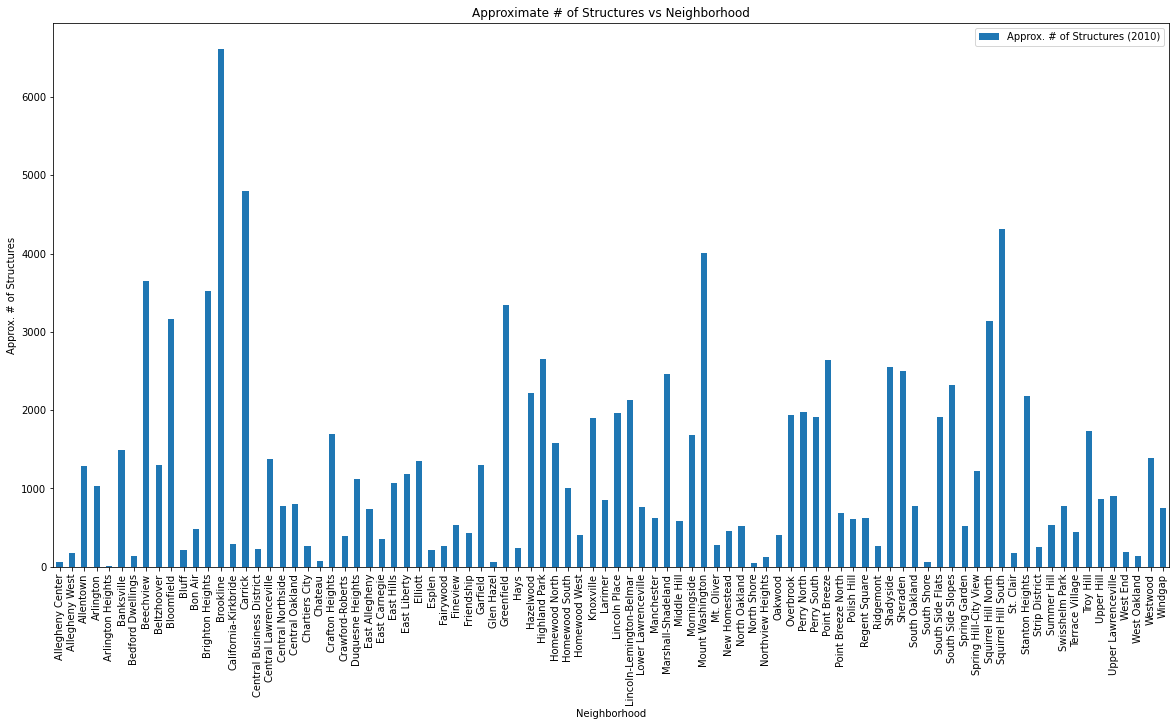

In [122]:
# shows us the bar graph for the number of structures per neighborhood
num_structures.plot(kind="bar", title="Approximate # of Structures vs Neighborhood", figsize=(20, 10))
plt.ylabel("Approx. # of Structures")

As mentioned before we have four neighborhoods with no violations: Allegheny Center, Glen Hazel, Northview Heights, and Arlington Heights. As you can see below Northview Heights has the most structures between the four with no violations making it our best neighborhood.

In [7]:
# calculating ratio for # of Code Violations / Approx. # of Structures
ratio_totals = code_violations.loc[:, "# Code Violations (2010)"].div(num_structures.loc[:, "Approx. # of Structures (2010)"])
ratio_totals_sorted = ratio_totals.sort_values(ascending=True)
ratio_totals_sorted.head()

Neighborhood
Allegheny Center     0.000000
Northview Heights    0.000000
Arlington Heights    0.000000
Glen Hazel           0.000000
Regent Square        0.001623
dtype: float64

In [10]:
ratio_totals_sorted.tail()

Neighborhood
South Oakland      0.244845
Homewood South     0.263889
Central Oakland    0.320099
Mt. Oliver         0.335793
West Oakland       0.357143
dtype: float64

In [11]:
ratio_totals_sorted.loc["Spring Garden"]

0.08949416342412451

Text(0, 0.5, 'Ratio')

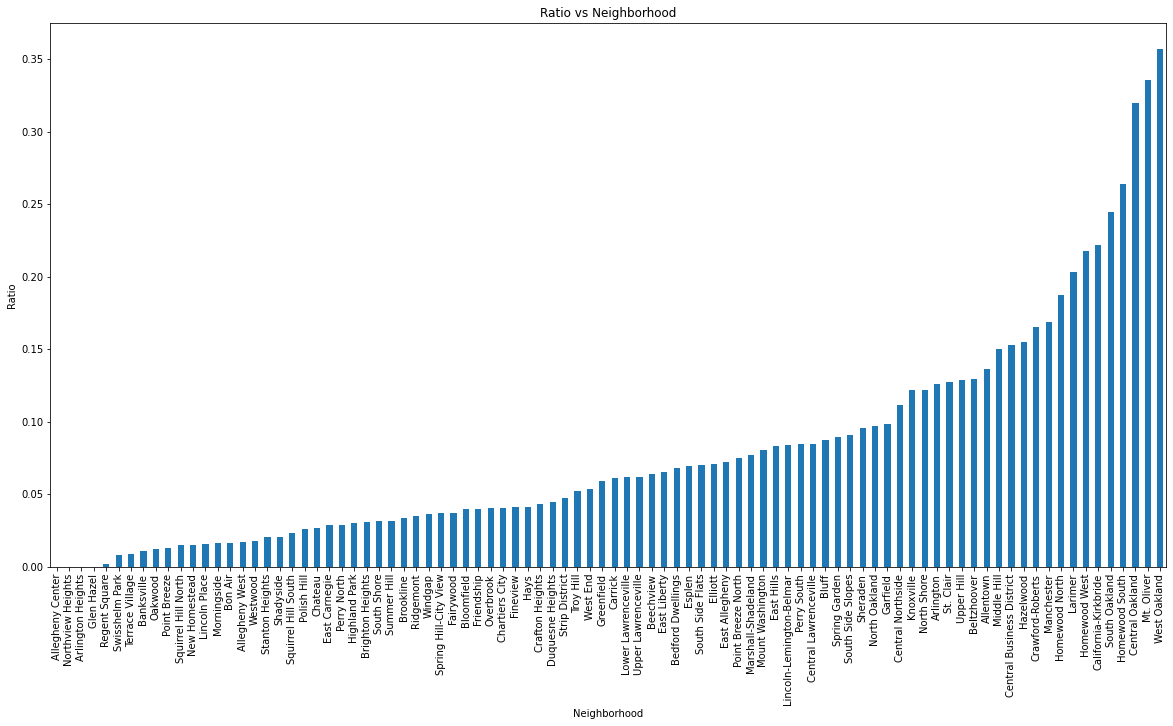

In [33]:
ratio_totals_sorted.plot(kind="bar", title="Ratio vs Neighborhood", figsize=(20, 10))
plt.ylabel("Ratio")

## Conclusion

In conclusion Northview Heights is the best neighborhood by its built environment condition.